In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import librosa
import librosa.display

import dataProcesser as dp

In [10]:
lis = ['usedvoice/man1(50)1.wav',
       'usedvoice/woman1(low)2.wav',
       'usedvoice/man2(45)3.wav',
       'usedvoice/woman2(high)(90)4.wav',
       'usedvoice/man3(6)5.wav',
       'usedvoice/woman3(midle)(60)6.wav',
       'usedvoice/man4(47)7.wav',
       'usedvoice/woman4(35)8.wav']

In [11]:
y = librosa.load(lis[0])[0]
rms = librosa.feature.rms(y=y)

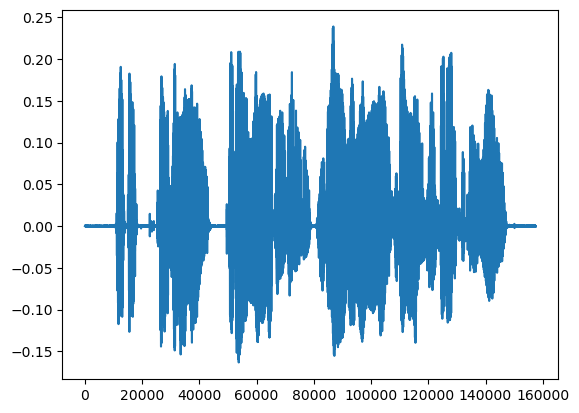

In [12]:
plt.plot(y)
plt.show()

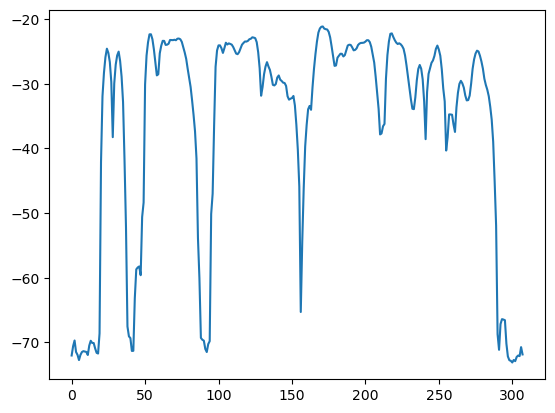

In [13]:
plt.plot(librosa.amplitude_to_db(rms[0]))

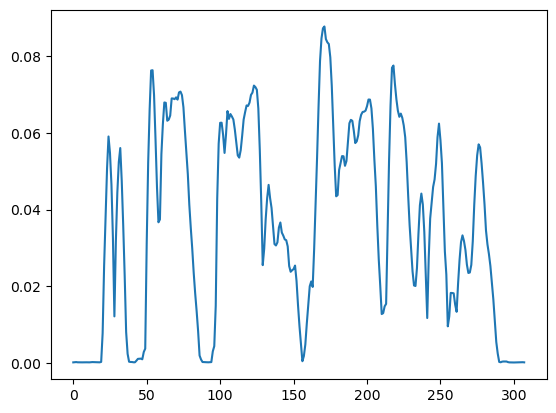

In [14]:
plt.plot(rms[0])

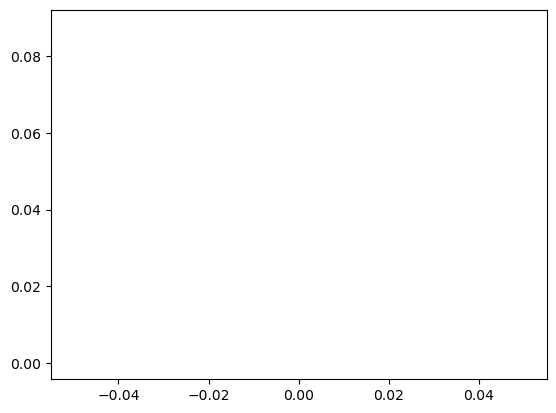

In [15]:
plt.plot(rms)
plt.show()

In [16]:
features_dic = {"db_maen": [],
                "db_std": [],
                "freq_mean": [],
                "freq_std": [],
                "active_time": [],
                "silent_time": [],
                "sl_time_std": [],
                "jitter_mean": [],
                "jitter_std": [],
                **{f"mfcc_{i+1}_mean":[] for i in range(13)},
                **{f"mfcc_{i+1}_std":[] for i in range(13)}
                }
for path in lis:
    y, sr = librosa.load(path)
    active_segments = dp.get_active_segments(y)
    db_mean, db_std = dp.get_db_features(active_segments)
    features_dic["db_maen"].append(db_mean)
    features_dic["db_std"].append(db_std)
    features_dic["active_time"].append(dp.get_speaking_time(y))
    silents_time, sl_time_std = dp.get_silent_time(y)
    features_dic["silent_time"].append(silents_time)
    features_dic["sl_time_std"].append(sl_time_std)
    freq_mean, freq_std, jitter_mean, jitter_std = dp.get_f0_features(active_segments)
    features_dic["freq_mean"].append(freq_mean)
    features_dic["freq_std"].append(freq_std)
    features_dic["jitter_mean"].append(jitter_mean)
    features_dic["jitter_std"].append(jitter_std)
    mfcc_mean, mfcc_std = dp.get_mfcc_features(active_segments)
    for i in range(13):
        features_dic[f"mfcc_{i+1}_mean"].append(mfcc_mean[i])
        features_dic[f"mfcc_{i+1}_std"].append(mfcc_std[i])

In [17]:
features_dic["db_maen"]

[0.04023407,
 0.04557238,
 0.060682785,
 0.035655446,
 0.041917022,
 0.03625154,
 0.055718474,
 0.048544645]

In [20]:
data = pd.read_csv('data.csv', encoding='utf-8')
median_data = np.array(data.iloc[1, 1:])
median_list = np.array([median_data[i*8:i*8+8] for i in range(15)]).astype(np.float32)
mean_data = np.array(data.iloc[0, 1:])
mean_list = np.array([mean_data[i*8:i*8+8] for i in range(15)]).astype(np.float32)
mode_data = np.array(data.iloc[2, 1:])
mode_list = np.array([mode_data[i*8:i*8+8] for i in range(15)]).astype(np.float32)
head_names = list(data.head(0))[1:]
head_names = [head_names[i*8:i*8+8] for i in range(15)]
head_list = [tmp[0][:-3] for tmp in head_names]

features = list(features_dic.values())
feature_names = list(features_dic.keys())
correlation_matrix = np.corrcoef(mean_list, features)[:len(median_list), len(median_list):]
correlation_matrix

array([[ 1.75860248e-01,  4.03320115e-01, -4.21453054e-01,
        -4.69111981e-01,  7.02456378e-01,  7.36670980e-01,
         7.71339076e-01, -4.86518465e-02, -3.20335326e-01,
        -1.86345169e-01,  5.91089365e-01,  2.72260497e-01,
         2.99612196e-01,  4.75641445e-01,  5.69524336e-01,
         5.59391290e-01,  3.32972797e-01,  4.81500801e-02,
        -1.27409449e-01,  4.28287918e-01,  2.67201024e-01,
        -2.01269654e-01, -3.10046555e-01, -4.44105765e-01,
        -4.36934039e-01, -5.84985112e-01,  1.92554656e-02,
        -1.71879915e-01, -8.87243516e-02,  7.10154689e-01,
         2.84165376e-01, -3.47091207e-01, -4.49727934e-01,
         2.04502412e-02,  2.06211670e-01],
       [-2.51750585e-01, -3.08684195e-01,  1.91838052e-01,
         3.53182901e-01,  1.93978654e-01,  8.47432313e-02,
         2.19896978e-01,  3.12223955e-01,  3.81020158e-01,
        -3.72633302e-01, -4.71972865e-01,  7.66923758e-01,
        -6.39939191e-01, -2.48104706e-01,  1.42786425e-01,
         4.56

In [21]:
mean_list[2]

array([3.2 , 3.3 , 3.79, 2.76, 3.4 , 2.97, 3.26, 2.99], dtype=float32)

In [22]:
correlation_df = pd.DataFrame(correlation_matrix, index=head_list, columns=feature_names).T.round(3)
correlation_df

,かすれ度合,この声は好みか,ボリューム,リッラクスの度合い,温かさ,響き,好みのイントネーションか,好みのことばの間,高さ,柔らかさ,心地よさ,速度,明るさ,明瞭であるか（滑舌）,力強さ
db_maen,0.176,-0.252,0.741,-0.009,-0.311,0.254,-0.145,-0.610,-0.307,-0.033,0.025,0.207,0.345,-0.052,0.538
db_std,0.403,-0.309,0.715,0.066,-0.097,0.268,-0.229,-0.406,-0.552,-0.067,-0.034,0.011,0.077,-0.310,0.506
freq_mean,-0.421,0.192,-0.674,0.115,-0.364,-0.367,0.258,-0.305,0.974,0.577,0.256,0.063,0.575,0.450,-0.624
freq_std,-0.469,0.353,-0.347,0.208,-0.107,-0.040,0.468,-0.264,0.824,0.620,0.489,0.274,0.816,0.639,-0.262
active_time,0.702,0.194,-0.188,0.630,0.067,0.140,0.139,-0.079,-0.235,0.420,0.254,-0.933,-0.386,-0.492,-0.263
silent_time,0.737,0.085,0.233,0.395,-0.044,0.210,0.085,-0.256,-0.386,0.184,0.136,-0.664,-0.257,-0.463,0.070
sl_time_std,0.771,0.220,-0.274,0.676,0.293,0.177,0.155,0.081,-0.341,0.410,0.270,-0.986,-0.534,-0.575,-0.303
jitter_mean,-0.049,0.312,0.603,0.097,0.077,0.507,0.465,-0.455,-0.010,0.140,0.446,0.421,0.641,0.440,0.587
jitter_std,-0.320,0.381,0.392,0.150,0.128,0.459,0.524,-0.321,0.223,0.287,0.545,0.517,0.797,0.639,0.456
mfcc_1_mean,-0.186,-0.373,0.729,-0.501,-0.397,0.004,-0.262,-0.431,-0.111,-0.385,-0.274,0.673,0.425,0.160,0.558


In [23]:
correlation_df["かすれ度合"].abs().sort_values(ascending=False).index

Index(['sl_time_std', 'silent_time', 'mfcc_8_std', 'active_time',
       'mfcc_2_mean', 'mfcc_4_std', 'mfcc_6_mean', 'mfcc_7_mean',
       'mfcc_5_mean', 'freq_std', 'mfcc_11_std', 'mfcc_2_std', 'mfcc_3_std',
       'mfcc_11_mean', 'freq_mean', 'db_std', 'mfcc_10_std', 'mfcc_8_mean',
       'jitter_std', 'mfcc_1_std', 'mfcc_4_mean', 'mfcc_9_std', 'mfcc_3_mean',
       'mfcc_12_mean', 'mfcc_13_std', 'mfcc_13_mean', 'mfcc_1_mean', 'db_maen',
       'mfcc_6_std', 'mfcc_10_mean', 'mfcc_7_std', 'jitter_mean',
       'mfcc_9_mean', 'mfcc_12_std', 'mfcc_5_std'],
      dtype='object')

In [24]:
ranking_df = pd.DataFrame()

for col in correlation_df.columns:
    sorted_col = correlation_df[col].abs().sort_values(ascending=False).index
    index_names = [f"{i}({correlation_df.loc[i, col]})" for i in sorted_col]
    ranking_df[col] = index_names

ranking_df

,かすれ度合,この声は好みか,ボリューム,リッラクスの度合い,温かさ,響き,好みのイントネーションか,好みのことばの間,高さ,柔らかさ,心地よさ,速度,明るさ,明瞭であるか（滑舌）,力強さ
0,sl_time_std(0.771),mfcc_3_mean(0.767),mfcc_13_mean(0.856),mfcc_3_mean(0.754),mfcc_13_std(0.814),mfcc_10_mean(0.874),mfcc_3_mean(0.69),mfcc_1_std(-0.917),freq_mean(0.974),mfcc_11_mean(-0.839),mfcc_10_mean(0.825),sl_time_std(-0.986),mfcc_2_mean(-0.831),mfcc_8_std(-0.846),mfcc_13_mean(0.743)
1,silent_time(0.737),mfcc_10_mean(0.693),db_maen(0.741),mfcc_10_mean(0.714),mfcc_3_mean(0.684),mfcc_3_mean(0.855),mfcc_4_mean(-0.654),mfcc_3_std(-0.679),mfcc_5_mean(-0.963),mfcc_12_std(-0.819),mfcc_11_mean(-0.781),active_time(-0.933),freq_std(0.816),mfcc_2_mean(-0.817),mfcc_11_std(0.64)
2,mfcc_8_std(0.71),mfcc_4_mean(-0.64),mfcc_1_mean(0.729),mfcc_6_std(-0.693),mfcc_3_std(-0.632),mfcc_12_mean(0.529),mfcc_10_mean(0.65),mfcc_7_std(0.65),mfcc_8_mean(-0.892),mfcc_13_mean(-0.719),mfcc_3_mean(0.735),mfcc_11_std(0.791),jitter_std(0.797),mfcc_11_mean(-0.64),mfcc_9_std(0.637)
3,active_time(0.702),mfcc_5_std(-0.506),db_std(0.715),sl_time_std(0.676),mfcc_7_mean(0.602),mfcc_8_mean(0.522),mfcc_2_mean(-0.557),mfcc_2_std(0.636),mfcc_4_std(0.863),mfcc_4_mean(-0.668),mfcc_12_std(-0.648),mfcc_13_mean(0.675),mfcc_11_mean(-0.787),freq_std(0.639),freq_mean(-0.624)
4,mfcc_2_mean(0.591),mfcc_11_mean(-0.491),mfcc_9_mean(-0.7),active_time(0.63),mfcc_1_std(-0.588),jitter_mean(0.507),mfcc_11_mean(-0.555),db_maen(-0.61),mfcc_2_mean(-0.844),freq_std(0.62),mfcc_4_mean(-0.61),mfcc_1_mean(0.673),mfcc_12_std(-0.672),jitter_std(0.639),mfcc_9_mean(-0.609)
5,mfcc_4_std(-0.585),mfcc_2_mean(-0.472),freq_mean(-0.674),mfcc_11_mean(-0.619),mfcc_8_mean(0.531),mfcc_6_std(-0.496),mfcc_12_std(-0.543),mfcc_12_std(0.528),freq_std(0.824),mfcc_2_std(-0.599),jitter_std(0.545),silent_time(-0.664),mfcc_8_std(-0.67),mfcc_4_std(0.616),jitter_mean(0.587)
6,mfcc_6_mean(0.57),mfcc_7_mean(0.457),mfcc_9_std(0.665),mfcc_13_mean(-0.614),mfcc_8_std(0.483),mfcc_9_std(0.481),jitter_std(0.524),jitter_mean(-0.455),mfcc_10_std(0.736),mfcc_5_mean(-0.598),mfcc_6_std(-0.505),mfcc_9_mean(-0.608),jitter_mean(0.641),sl_time_std(-0.575),mfcc_5_mean(0.583)
7,mfcc_7_mean(0.559),mfcc_8_std(-0.436),mfcc_5_mean(0.655),mfcc_12_mean(0.57),mfcc_7_std(0.465),mfcc_10_std(-0.473),freq_std(0.468),mfcc_12_mean(0.433),mfcc_4_mean(-0.711),freq_mean(0.577),freq_std(0.489),mfcc_6_mean(-0.582),mfcc_1_std(0.638),mfcc_4_mean(-0.521),mfcc_1_mean(0.558)
8,mfcc_5_mean(0.476),mfcc_12_std(-0.43),mfcc_4_std(-0.651),mfcc_12_std(-0.544),mfcc_12_mean(0.43),jitter_std(0.459),jitter_mean(0.465),mfcc_1_mean(-0.431),mfcc_11_mean(-0.637),mfcc_5_std(-0.57),mfcc_5_std(-0.482),mfcc_6_std(0.549),mfcc_3_std(0.61),mfcc_5_mean(-0.499),db_maen(0.538)
9,freq_std(-0.469),mfcc_4_std(0.414),mfcc_11_std(0.622),mfcc_5_std(-0.525),mfcc_1_mean(-0.397),freq_mean(-0.367),mfcc_5_std(-0.461),db_std(-0.406),mfcc_12_std(-0.618),mfcc_11_std(-0.475),mfcc_2_mean(-0.476),mfcc_12_mean(-0.523),mfcc_5_mean(-0.579),mfcc_10_mean(0.494),mfcc_8_mean(0.535)


In [25]:
result_df = ranking_df.iloc[:5, :].T
result_df.columns = ["1st", "2nd", "3rd", "4th", "5th"]
result_df

,1st,2nd,3rd,4th,5th
かすれ度合,sl_time_std(0.771),silent_time(0.737),mfcc_8_std(0.71),active_time(0.702),mfcc_2_mean(0.591)
この声は好みか,mfcc_3_mean(0.767),mfcc_10_mean(0.693),mfcc_4_mean(-0.64),mfcc_5_std(-0.506),mfcc_11_mean(-0.491)
ボリューム,mfcc_13_mean(0.856),db_maen(0.741),mfcc_1_mean(0.729),db_std(0.715),mfcc_9_mean(-0.7)
リッラクスの度合い,mfcc_3_mean(0.754),mfcc_10_mean(0.714),mfcc_6_std(-0.693),sl_time_std(0.676),active_time(0.63)
温かさ,mfcc_13_std(0.814),mfcc_3_mean(0.684),mfcc_3_std(-0.632),mfcc_7_mean(0.602),mfcc_1_std(-0.588)
響き,mfcc_10_mean(0.874),mfcc_3_mean(0.855),mfcc_12_mean(0.529),mfcc_8_mean(0.522),jitter_mean(0.507)
好みのイントネーションか,mfcc_3_mean(0.69),mfcc_4_mean(-0.654),mfcc_10_mean(0.65),mfcc_2_mean(-0.557),mfcc_11_mean(-0.555)
好みのことばの間,mfcc_1_std(-0.917),mfcc_3_std(-0.679),mfcc_7_std(0.65),mfcc_2_std(0.636),db_maen(-0.61)
高さ,freq_mean(0.974),mfcc_5_mean(-0.963),mfcc_8_mean(-0.892),mfcc_4_std(0.863),mfcc_2_mean(-0.844)
柔らかさ,mfcc_11_mean(-0.839),mfcc_12_std(-0.819),mfcc_13_mean(-0.719),mfcc_4_mean(-0.668),freq_std(0.62)
